In [ ]:
# import csv
# import numpy as np
# import pandas as pd
# from math import factorial

# import datetime
# from datetime import date, datetime, timedelta
# import datetime
# import time

# import scipy
# import os, os.path
# from os import listdir
# from os.path import isfile, join

# import re
# # from pprint import pprint
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# import seaborn as sb

# import sys

# # search path for modules
# # look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
# sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
# import NASA_core as nc
# import NASA_plot_core as npc

In [1]:
import csv
import numpy as np
import pandas as pd

import datetime
from datetime import date
import time

import scipy
import scipy.signal
import os, os.path

from patsy import cr

# from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import register_matplotlib_converters

from datetime import datetime
register_matplotlib_converters()

import sys
start_time = time.time()

sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

In [2]:
param_dir = "/Users/hn/Documents/01_research_data/NASA/Jan10_22_verticalLineInPlots/"
raw_dir = param_dir
data_dir = param_dir
SOS_plot_dir = param_dir
eval_dir = param_dir

In [3]:
county = "Walla2015"

In [4]:
if county == "Monterey2014":
    raw_names = ["L7_T1C2L2_Scaled_Monterey2014_2013-01-01_2016-01-01.csv",
                 "L8_T1C2L2_Scaled_Monterey2014_2013-01-01_2016-01-01.csv"]

elif county == "AdamBenton2016":
    raw_names = ["L7_T1C2L2_Scaled_AdamBenton2016_2015-01-01_2017-10-14.csv",
                 "L8_T1C2L2_Scaled_AdamBenton2016_2015-01-01_2017-10-14.csv"]

elif county == "FranklinYakima2018":
    raw_names = ["L7_T1C2L2_Scaled_FranklinYakima2018_2017-01-01_2019-10-14.csv",
                 "L8_T1C2L2_Scaled_FranklinYakima2018_2017-01-01_2019-10-14.csv"]

elif county == "Grant2017":
    raw_names = ["L7_T1C2L2_Scaled_Grant2017_2016-01-01_2018-10-14.csv",
                 "L8_T1C2L2_Scaled_Grant2017_2016-01-01_2018-10-14.csv"]

elif county == "Walla2015":
    raw_names = ["L7_T1C2L2_Scaled_Walla2015_2014-01-01_2016-12-31.csv",
                 "L8_T1C2L2_Scaled_Walla2015_2014-01-01_2016-12-31.csv"]

In [5]:
SF_data_name = county + ".csv"

SG_df_NDVI = pd.read_csv(data_dir + "SG_" + county + "_NDVI_JFD.csv")
SG_df_EVI  = pd.read_csv(data_dir + "SG_" + county + "_EVI_JFD.csv")
eval_tb = pd.read_csv(eval_dir + "evaluation_set.csv")

if county == "AdamBenton2016":
    eval_tb = eval_tb[eval_tb.county.isin(["Adams", "Benton"])]
elif county == "FranklinYakima2018":
    eval_tb = eval_tb[eval_tb.county.isin(["Franklin", "Yakima"])]
elif county == "Grant2017":
    eval_tb = eval_tb[eval_tb.county == "Grant"]
elif county == "Walla2015":
    eval_tb = eval_tb[eval_tb.county == "Walla Walla"]


In [6]:
SG_df_NDVI['human_system_start_time'] = pd.to_datetime(SG_df_NDVI['human_system_start_time'])
SG_df_EVI['human_system_start_time'] = pd.to_datetime(SG_df_EVI['human_system_start_time'])


In [7]:
# Monterays ID will be read as integer, convert to string
SG_df_EVI["ID"] = SG_df_EVI["ID"].astype(str)
SG_df_NDVI["ID"] = SG_df_NDVI["ID"].astype(str)


In [8]:
L7 = pd.read_csv(raw_dir + raw_names[0], low_memory=False)
L8 = pd.read_csv(raw_dir + raw_names[1], low_memory=False)
raw_df = pd.concat([L7, L8])
raw_df["ID"] = raw_df["ID"].astype(str)
del (L7, L8)


In [9]:
SF_data = pd.read_csv(param_dir + SF_data_name)
SF_data["ID"] = SF_data["ID"].astype(str)

print ("line 129")
print (raw_df.shape)
print (SG_df_NDVI.shape)
print (SG_df_EVI.shape)


line 129
(7609210, 4)
(1127649, 3)
(1127649, 3)


In [10]:
# print (SF_data.head(1))
# print (raw_df.head(1))
# print (SG_df_NDVI.head(1))
# print (SG_df_EVI.head(1))


In [11]:
if county != "Monterey2014":
    # filter by last survey date. Last 4 digits of county name!
    SF_data = nc.filter_by_lastSurvey(SF_data, year = county[-4:]) 
    SF_data = nc.filter_out_NASS(SF_data)         # Toss NASS
    SF_data = nc.filter_out_nonIrrigated(SF_data) # keep only irrigated lands
    print ("line 130")
    print (SF_data.shape)
    print (SF_data.head(2))
    
    fuck = list(SF_data.ID)
    raw_df    = raw_df[raw_df.ID.isin(fuck)]
    SG_df_EVI = SG_df_EVI[SG_df_EVI.ID.isin(fuck)]
    SG_df_NDVI= SG_df_NDVI[SG_df_NDVI.ID.isin(fuck)]

    print ("line 138")
    print (raw_df.shape)
    print (SG_df_NDVI.shape)
    print (SG_df_EVI.shape)

    print (raw_df.head(1))
    print (SG_df_NDVI.head(1))
    print (SG_df_EVI.head(1))

line 130
(3382, 15)
                     ID       CropGrp      CropTyp  Acres    Irrigtn  \
23  143023_WSDA_SF_2015    Hay/Silage  alfalfa hay     85  sprinkler   
26  143976_WSDA_SF_2015  Cereal Grain        wheat     49  sprinkler   

                IntlSrD              LstSrvD DataSrc Notes        TRS  \
23  2004/07/21 00:00:00  2015/07/13 00:00:00    wsda   NaN  T06R36E10   
26  2004/06/02 00:00:00  2015/06/16 00:00:00    wsda   NaN  T07R34E13   

         county       RtCrpTy    ExctAcr      Shp_Lng        Shap_Ar  
23  Walla Walla      Pea, Dry  84.738467  2631.427808  342924.409221  
26  Walla Walla  Alfalfa Seed  49.484404  2030.563633  200256.276253  
line 138
(2509444, 4)
(371814, 3)
(371814, 3)
                      ID  NDVI  EVI  system_start_time
187  151507_WSDA_SF_2015   NaN  NaN                NaN
                       ID human_system_start_time      NDVI
2528  143023_WSDA_SF_2015              2014-01-05  0.435842
                       ID human_system_start_time     

In [12]:
raw_df_EVI = raw_df.copy()
raw_df_NDVI = raw_df.copy()
del(raw_df)


In [13]:
raw_df_EVI.drop(["NDVI"], axis=1, inplace=True)
raw_df_NDVI.drop(["EVI"], axis=1, inplace=True)

raw_df_EVI = raw_df_EVI[raw_df_EVI["EVI"].notna()]
raw_df_NDVI = raw_df_NDVI[raw_df_NDVI["NDVI"].notna()]

raw_df_EVI = nc.add_human_start_time_by_system_start_time(raw_df_EVI)
raw_df_NDVI= nc.add_human_start_time_by_system_start_time(raw_df_NDVI)

########################################

SG_df_NDVI = nc.initial_clean(df = SG_df_NDVI, column_to_be_cleaned = "NDVI")
SG_df_EVI = nc.initial_clean(df = SG_df_EVI, column_to_be_cleaned = "EVI")

raw_df_NDVI = nc.initial_clean(df = raw_df_NDVI, column_to_be_cleaned = "NDVI")
raw_df_EVI = nc.initial_clean(df = raw_df_EVI, column_to_be_cleaned = "EVI")

counter = 0


In [14]:
### List of unique fields
IDs = np.sort(eval_tb["ID"].unique())
print ("_____________________________________")
print('len(IDs) is {}!'.format(len(IDs)))
print ("_____________________________________")


_____________________________________
len(IDs) is 649!
_____________________________________


In [15]:
given_year = int(county[-4:])
min_year = pd.to_datetime(datetime(given_year-1, 1, 1))
max_year = pd.to_datetime(datetime(given_year+1, 12, 31))
SG_df_NDVI = SG_df_NDVI[SG_df_NDVI.human_system_start_time >= min_year]
SG_df_NDVI = SG_df_NDVI[SG_df_NDVI.human_system_start_time <= max_year]

SG_df_EVI = SG_df_EVI[SG_df_EVI.human_system_start_time >= min_year]
SG_df_EVI = SG_df_EVI[SG_df_EVI.human_system_start_time <= max_year]

print ("line 201")
print (SG_df_NDVI.shape)
print (SG_df_EVI.shape)

line 201
(371814, 3)
(371814, 3)


In [16]:
ID = IDs[0]

In [17]:
curr_SF_data = SF_data[SF_data['ID'] == ID].copy()
curr_SG_NDVI = SG_df_NDVI[SG_df_NDVI['ID'] == ID].copy()
curr_SG_NDVI.sort_values(by=['human_system_start_time'], inplace=True)
curr_SG_NDVI.reset_index(drop=True, inplace=True)

curr_raw_NDVI = raw_df_NDVI[raw_df_NDVI['ID'] == ID].copy()
curr_raw_NDVI.sort_values(by=['human_system_start_time'], inplace=True)
curr_raw_NDVI.reset_index(drop=True, inplace=True)


curr_SG_EVI = SG_df_EVI[SG_df_EVI['ID'] == ID].copy()
curr_SG_EVI.sort_values(by=['human_system_start_time'], inplace=True)
curr_SG_EVI.reset_index(drop=True, inplace=True)

curr_raw_EVI = raw_df_EVI[raw_df_EVI['ID'] == ID].copy()
curr_raw_EVI.sort_values(by=['human_system_start_time'], inplace=True)
curr_raw_EVI.reset_index(drop=True, inplace=True)
################################################################

In [33]:
def SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt, SG_dt, idx, ax, onset_cut=0.5, offset_cut=0.5):
    """
    This is created after the meeting on Jan, 10, 2022.
     Changes made to the previous function (SG_clean_SOS_orchardinPlot):
           a. Vertical lines for time reference
           b. Add area of fields to the title of the plots.    (Done in Driver)
           c. In the title break AdamBenton2016 to one county! (Done in Driver)
           d. make the previous and next auxiliary years gray backgound.
    """


    """Returns A plot with of a given VI (NDVI or EVI) with SOS and EOS points.

    Arguments
    ---------
    raw_dt : dataframe
        pandas dataframe of raw observations from Google Earth Engine
    
    SG_dt  : dataframe
        pandas dataframe of smoothed version of data points.
    
    idx : str
        A string indicating vegetation index.
    
    ax : axis
       An axis object of Matplotlib.
    
    onset_cut : float
        Start Of Season threshold
    offset_cut : float
        End Of Season threshold

    Returns
    -------
    A plot a given VI (NDVI or EVI) with SOS and EOS points.
    """
    assert (len(SG_dt['ID'].unique()) == 1)

    #############################################
    ###
    ###      find SOS's and EOS's
    ###
    #############################################
    ratio_colName = idx + "_ratio"
    SEOS_output_columns = ['ID', idx, 'human_system_start_time', 
                           ratio_colName, 'SOS', 'EOS', 'season_count']

    """
     The reason I am multiplying len(SG_dt) by 4 is that we can have at least two
     seasons which means 2 SOS and 2 EOS. So, at least 4 rows are needed.
     and the reason for 14 is that there are 14 years from 2008 to 2021.
    """
    all_poly_and_SEOS = pd.DataFrame(data = None, 
                                     index = np.arange(4*14*len(SG_dt)), 
                                     columns = SEOS_output_columns)
    unique_years = SG_dt['human_system_start_time'].dt.year.unique()
    
    pointer_SEOS_tab = 0
    SG_dt = SG_dt[SEOS_output_columns[0:3]]
    
    """
    detect SOS and EOS in each year
    """
    yr_count = 0
    for yr in unique_years:
        curr_field_yr = SG_dt[SG_dt['human_system_start_time'].dt.year == yr].copy()
        y_orchard = curr_field_yr[curr_field_yr['human_system_start_time'].dt.month >= 5]
        y_orchard = y_orchard[y_orchard['human_system_start_time'].dt.month <= 10]
        y_orchard_range = max(y_orchard[idx]) - min(y_orchard[idx])

        if y_orchard_range > 0.3:
            curr_field_yr = nc.addToDF_SOS_EOS_White(pd_TS = curr_field_yr,
                                                     VegIdx = idx, 
                                                     onset_thresh = onset_cut, 
                                                     offset_thresh = offset_cut)
            curr_field_yr = nc.Null_SOS_EOS_by_DoYDiff(pd_TS=curr_field_yr, min_season_length=40)
        else:
            VegIdx_min = curr_field_yr[idx].min()
            VegIdx_max = curr_field_yr[idx].max()
            VegRange = VegIdx_max - VegIdx_min + sys.float_info.epsilon
            curr_field_yr[ratio_colName] = (curr_field_yr[idx] - VegIdx_min) / VegRange
            curr_field_yr['SOS'] = 666
            curr_field_yr['EOS'] = 666
        #############################################
        ###
        ###             plot
        ###
        #############################################
        # sb.set();
        # plot SG smoothed
        ax.plot(SG_dt['human_system_start_time'], SG_dt[idx], c='k', linewidth=2,
                label= 'SG' if yr_count == 0 else "");

        ax.scatter(raw_dt['human_system_start_time'], raw_dt[idx], 
                   s=7, c='dodgerblue', label="raw" if yr_count == 0 else "");
        ###
        ###   plot SOS and EOS
        ###
        #
        #  SOS
        #
        SOS = curr_field_yr[curr_field_yr['SOS'] != 0]
        if len(SOS)>0: # dataframe might be empty
            if SOS.iloc[0]['SOS'] != 666:
                ax.scatter(SOS['human_system_start_time'], SOS['SOS'], marker='+', s=155, c='g', 
                          label="")
                # annotate SOS
                for ii in np.arange(0, len(SOS)):
                    style = dict(size=10, color='g', rotation='vertical')
                    print (str(SOS.iloc[ii]['human_system_start_time'].date()))
                    print(str(SOS.iloc[ii]['human_system_start_time'].date())[5:])
                    ax.text(x = SOS.iloc[ii]['human_system_start_time'].date(), 
                            y = -0.05, 
                            s = str(SOS.iloc[ii]['human_system_start_time'].date())[5:], #
                            **style)
            else:
                 ax.plot(curr_field_yr['human_system_start_time'], 
                         np.ones(len(curr_field_yr['human_system_start_time']))*1, 
                         c='g', linewidth=2);
        #
        #  EOS
        #
        EOS = curr_field_yr[curr_field_yr['EOS'] != 0]
        if len(EOS)>0: # dataframe might be empty
            if EOS.iloc[0]['EOS'] != 666:
                ax.scatter(EOS['human_system_start_time'], EOS['EOS'], 
                           marker='+', s=155, c='r', 
                           label="")

                # annotate EOS
                for ii in np.arange(0, len(EOS)):
                    style = dict(size=10, color='r', rotation='vertical')
                    ax.text(x = EOS.iloc[ii]['human_system_start_time'].date(), 
                            y = -0.05, 
                            s = str(EOS.iloc[ii]['human_system_start_time'].date())[6:], #[6:]
                            **style)

        # Plot ratios:
#         ax.plot(curr_field_yr['human_system_start_time'], 
#                 curr_field_yr[ratio_colName], 
#                 c='gray', label=ratio_colName if yr_count == 0 else "")
        yr_count += 1

    # ax.axhline(0 , color = 'r', linewidth=.5)
    # ax.axhline(1 , color = 'r', linewidth=.5)

    ax.set_title(SG_dt['ID'].unique()[0] + ", cut: " + str(onset_cut) + ", " + idx);
    ax.set(ylabel=idx)

    # ax.set_xlim([datetime.date(2007, 12, 10), datetime.date(2022, 1, 10)])
    ax.set_xlim([SG_dt.human_system_start_time.min() - timedelta(10), 
                 SG_dt.human_system_start_time.max() + timedelta(10)])
    
    ax.set_ylim([-0.3, 1.15])
    import matplotlib.dates as mdates
    # ax.xaxis.set_major_locator(mdates.YearLocator(2)) # every year.
    from matplotlib.dates import MonthLocator, DateFormatter
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(18))
    # ax.right_ax.grid(False)
    # ax.grid(b=None)
    
    ax.legend(loc="upper left");


2014-03-06
03-06
2016-04-24
04-24
2014-03-26
03-26
2016-05-04
05-04


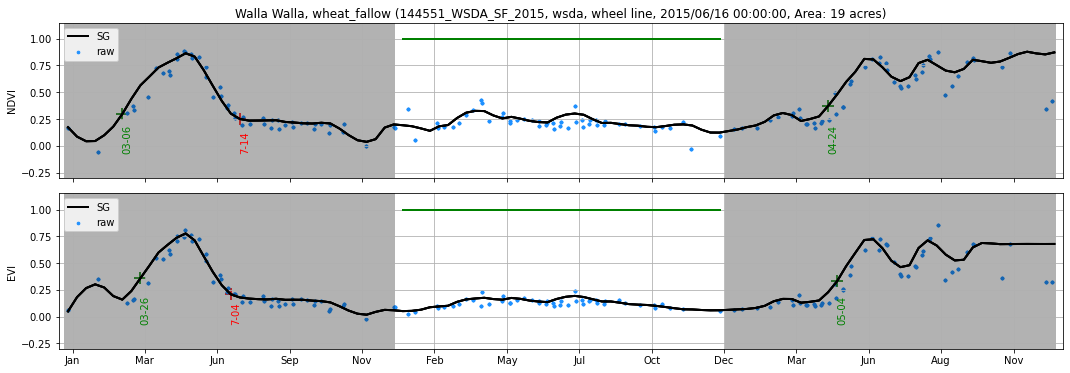

In [34]:
from datetime import date, datetime, timedelta
fig, axs = plt.subplots(2, 1, figsize=(18, 6),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2) = axs;
ax1.grid(True); ax2.grid(True); 
# ax3.grid(True); ax4.grid(True); ax5.grid(True); ax6.grid(True);

# Plot NDVIs
SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_NDVI,
                                        SG_dt = curr_SG_NDVI,
                                        idx = "NDVI",
                                        ax = ax1,
                                        onset_cut = 0.3, 
                                        offset_cut = 0.3);

# Plot EVIs
SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_EVI,
                                            SG_dt = curr_SG_EVI,
                                            idx = "EVI",
                                            ax = ax2,
                                            onset_cut = 0.3, 
                                            offset_cut = 0.3);

from datetime import datetime
ax1.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax1.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)

start = str(given_year) + '-01-01'
end = str(given_year) + '-12-01'
vertical_dates = pd.date_range(start, end, freq='MS')
vertical_dates = vertical_dates[::3]
# ax1.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

# ax2.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

vertical_annotations = vertical_dates[::3]
# style = dict(size=10, color='g', rotation='vertical')
# for ii in np.arange(0, len(vertical_annotations)):
#     ax1.text(x = vertical_annotations[ii],
#              y = 0, 
#              s= str(vertical_dates[ii].month) + "-" + str(vertical_dates[ii].day),
#              **style
#             )
"""
   Title is already set in the function above. 
   We can replace/overwrite it here:
"""
if county == "Monterey2014":
    plant = curr_SF_data['Crop2014'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = "Land IQ"
    survey_date = curr_SF_data['LstModDat'].unique()[0]
    plot_title = county + ", " + plant + " (" + ID + ", " + data_source + ", " + survey_date +")"
else:
    plant = curr_SF_data['CropTyp'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = curr_SF_data['DataSrc'].unique()[0]
    irrig_type = curr_SF_data['Irrigtn'].unique()[0]
    survey_date = curr_SF_data['LstSrvD'].unique()[0]
    cc =  curr_SF_data.county.unique()[0]
    area = curr_SF_data.Acres.unique()[0]
    
    plot_title = cc + ", " + plant + " (" + ID + ", " + data_source + ", " + \
                   irrig_type + ", " + survey_date + ", Area: " + str(area) + " acres)"

ax1.set_title(plot_title);
ax2.set_title("");


# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
# for label in ax1.get_xticklabels(which='major'):
#     label.set(rotation=90, horizontalalignment='right')

# ax1.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
# ax2.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))

plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path + county + "_" + ID +'.png'
plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight', facecolor="w")
# plt.close('all')
counter += 1

In [ ]:
def SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt, SG_dt, idx, ax, onset_cut=0.5, offset_cut=0.5):
    """
    This is created after the meeting on Jan, 10, 2022.
     Changes made to the previous function (SG_clean_SOS_orchardinPlot):
           a. Vertical lines for time reference
           b. Add area of fields to the title of the plots.    (Done in Driver)
           c. In the title break AdamBenton2016 to one county! (Done in Driver)
           d. make the previous and next auxiliary years gray backgound.
    """


    """Returns A plot with of a given VI (NDVI or EVI) with SOS and EOS points.

    Arguments
    ---------
    raw_dt : dataframe
        pandas dataframe of raw observations from Google Earth Engine
    
    SG_dt  : dataframe
        pandas dataframe of smoothed version of data points.
    
    idx : str
        A string indicating vegetation index.
    
    ax : axis
       An axis object of Matplotlib.
    
    onset_cut : float
        Start Of Season threshold
    offset_cut : float
        End Of Season threshold

    Returns
    -------
    A plot a given VI (NDVI or EVI) with SOS and EOS points.
    """
    assert (len(SG_dt['ID'].unique()) == 1)

    #############################################
    ###
    ###      find SOS's and EOS's
    ###
    #############################################
    ratio_colName = idx + "_ratio"
    SEOS_output_columns = ['ID', idx, 'human_system_start_time', 
                           ratio_colName, 'SOS', 'EOS', 'season_count']

    """
     The reason I am multiplying len(SG_dt) by 4 is that we can have at least two
     seasons which means 2 SOS and 2 EOS. So, at least 4 rows are needed.
     and the reason for 14 is that there are 14 years from 2008 to 2021.
    """
    all_poly_and_SEOS = pd.DataFrame(data = None, 
                                     index = np.arange(4*14*len(SG_dt)), 
                                     columns = SEOS_output_columns)
    unique_years = SG_dt['human_system_start_time'].dt.year.unique()
    
    pointer_SEOS_tab = 0
    SG_dt = SG_dt[SEOS_output_columns[0:3]]
    
    """
    detect SOS and EOS in each year
    """
    yr_count = 0
    for yr in unique_years:
        curr_field_yr = SG_dt[SG_dt['human_system_start_time'].dt.year == yr].copy()
        y_orchard = curr_field_yr[curr_field_yr['human_system_start_time'].dt.month >= 5]
        y_orchard = y_orchard[y_orchard['human_system_start_time'].dt.month <= 10]
        y_orchard_range = max(y_orchard[idx]) - min(y_orchard[idx])

        if y_orchard_range > 0.3:
            curr_field_yr = nc.addToDF_SOS_EOS_White(pd_TS = curr_field_yr,
                                                     VegIdx = idx, 
                                                     onset_thresh = onset_cut, 
                                                     offset_thresh = offset_cut)
            curr_field_yr = nc.Null_SOS_EOS_by_DoYDiff(pd_TS=curr_field_yr, min_season_length=40)
        else:
            VegIdx_min = curr_field_yr[idx].min()
            VegIdx_max = curr_field_yr[idx].max()
            VegRange = VegIdx_max - VegIdx_min + sys.float_info.epsilon
            curr_field_yr[ratio_colName] = (curr_field_yr[idx] - VegIdx_min) / VegRange
            curr_field_yr['SOS'] = 666
            curr_field_yr['EOS'] = 666
        #############################################
        ###
        ###             plot
        ###
        #############################################
        # sb.set();
        # plot SG smoothed
        ax.plot(SG_dt['human_system_start_time'], SG_dt[idx], c='k', linewidth=2,
                label= 'SG' if yr_count == 0 else "");

        ax.scatter(raw_dt['human_system_start_time'], raw_dt[idx], 
                   s=7, c='dodgerblue', label="raw" if yr_count == 0 else "");
        ###
        ###   plot SOS and EOS
        ###
        #
        #  SOS
        #
        SOS = curr_field_yr[curr_field_yr['SOS'] != 0]
        if len(SOS)>0: # dataframe might be empty
            if SOS.iloc[0]['SOS'] != 666:
                ax.scatter(SOS['human_system_start_time'], SOS['SOS'], marker='+', s=155, c='g', 
                          label="")
                # annotate SOS
                for ii in np.arange(0, len(SOS)):
                    style = dict(size=10, color='g', rotation='vertical')
                    ax.text(x = SOS.iloc[ii]['human_system_start_time'].date(), 
                            y = -0.05, 
                            s = str(SOS.iloc[ii]['human_system_start_time'].date())[6:], #
                            **style)
            else:
                 ax.plot(curr_field_yr['human_system_start_time'], 
                         np.ones(len(curr_field_yr['human_system_start_time']))*1, 
                         c='g', linewidth=2);
        #
        #  EOS
        #
        EOS = curr_field_yr[curr_field_yr['EOS'] != 0]
        if len(EOS)>0: # dataframe might be empty
            if EOS.iloc[0]['EOS'] != 666:
                ax.scatter(EOS['human_system_start_time'], EOS['EOS'], 
                           marker='+', s=155, c='r', 
                           label="")

                # annotate EOS
                for ii in np.arange(0, len(EOS)):
                    style = dict(size=10, color='r', rotation='vertical')
                    ax.text(x = EOS.iloc[ii]['human_system_start_time'].date(), 
                            y = -0.05, 
                            s = str(EOS.iloc[ii]['human_system_start_time'].date())[6:], #[6:]
                            **style)

        # Plot ratios:
#         ax.plot(curr_field_yr['human_system_start_time'], 
#                 curr_field_yr[ratio_colName], 
#                 c='gray', label=ratio_colName if yr_count == 0 else "")
        yr_count += 1

    # ax.axhline(0 , color = 'r', linewidth=.5)
    # ax.axhline(1 , color = 'r', linewidth=.5)

    ax.set_title(SG_dt['ID'].unique()[0] + ", cut: " + str(onset_cut) + ", " + idx);
    ax.set(ylabel=idx)

    # ax.set_xlim([datetime.date(2007, 12, 10), datetime.date(2022, 1, 10)])
    ax.set_xlim([SG_dt.human_system_start_time.min() - timedelta(10), 
                 SG_dt.human_system_start_time.max() + timedelta(10)])
    
    ax.set_ylim([-0.3, 1.15])
    # ax.xaxis.set_major_locator(mdates.YearLocator(2)) # every year.
    from matplotlib.dates import MonthLocator, DateFormatter
    # ax.xaxis.set_major_locator(mdates.MonthLocator())
    #ax.xaxis.set_major_formatter(DateFormatter('%b'))
    # ax.xaxis.set_major_locator(plt.MaxNLocator(18))
    # ax.right_ax.grid(False)
    # ax.grid(b=None)
    
    ax.legend(loc="upper left");


In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2) = axs;
ax1.grid(True); ax2.grid(True); 
# ax3.grid(True); ax4.grid(True); ax5.grid(True); ax6.grid(True);

# Plot NDVIs
SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_NDVI,
                                        SG_dt = curr_SG_NDVI,
                                        idx = "NDVI",
                                        ax = ax1,
                                        onset_cut = 0.3, 
                                        offset_cut = 0.3);

# Plot EVIs
SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_EVI,
                                            SG_dt = curr_SG_EVI,
                                            idx = "EVI",
                                            ax = ax2,
                                            onset_cut = 0.3, 
                                            offset_cut = 0.3);

from datetime import datetime
ax1.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax1.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)

start = str(given_year) + '-01-01'
end = str(given_year) + '-12-01'
vertical_dates = pd.date_range(start, end, freq='MS')
vertical_dates = vertical_dates[::3]
# ax1.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

# ax2.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

vertical_annotations = vertical_dates[::3]
# style = dict(size=10, color='g', rotation='vertical')
# for ii in np.arange(0, len(vertical_annotations)):
#     ax1.text(x = vertical_annotations[ii],
#              y = 0, 
#              s= str(vertical_dates[ii].month) + "-" + str(vertical_dates[ii].day),
#              **style
#             )
"""
   Title is already set in the function above. 
   We can replace/overwrite it here:
"""
if county == "Monterey2014":
    plant = curr_SF_data['Crop2014'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = "Land IQ"
    survey_date = curr_SF_data['LstModDat'].unique()[0]
    plot_title = county + ", " + plant + " (" + ID + ", " + data_source + ", " + survey_date +")"
else:
    plant = curr_SF_data['CropTyp'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = curr_SF_data['DataSrc'].unique()[0]
    irrig_type = curr_SF_data['Irrigtn'].unique()[0]
    survey_date = curr_SF_data['LstSrvD'].unique()[0]
    cc =  curr_SF_data.county.unique()[0]
    area = curr_SF_data.Acres.unique()[0]
    
    plot_title = cc + ", " + plant + " (" + ID + ", " + data_source + ", " + \
                   irrig_type + ", " + survey_date + ", Area: " + str(area) + " acres)"

ax1.set_title(plot_title);
ax2.set_title("");


# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
# for label in ax1.get_xticklabels(which='major'):
#     label.set(rotation=90, horizontalalignment='right')

# ax1.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
ax2.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))

plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path + county + "_" + ID +'_better.png'
plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight', facecolor="w")
# plt.close('all')
counter += 1

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2) = axs;
ax1.grid(True); ax2.grid(True); 
# ax3.grid(True); ax4.grid(True); ax5.grid(True); ax6.grid(True);

# Plot NDVIs
SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_NDVI,
                                        SG_dt = curr_SG_NDVI,
                                        idx = "NDVI",
                                        ax = ax1,
                                        onset_cut = 0.3, 
                                        offset_cut = 0.3);

# Plot EVIs
SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_EVI,
                                            SG_dt = curr_SG_EVI,
                                            idx = "EVI",
                                            ax = ax2,
                                            onset_cut = 0.3, 
                                            offset_cut = 0.3);

from datetime import datetime
ax1.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax1.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)

start = str(given_year) + '-01-01'
end = str(given_year) + '-12-01'
vertical_dates = pd.date_range(start, end, freq='MS')
vertical_dates = vertical_dates[::3]
# ax1.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

# ax2.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

vertical_annotations = vertical_dates[::3]
# style = dict(size=10, color='g', rotation='vertical')
# for ii in np.arange(0, len(vertical_annotations)):
#     ax1.text(x = vertical_annotations[ii],
#              y = 0, 
#              s= str(vertical_dates[ii].month) + "-" + str(vertical_dates[ii].day),
#              **style
#             )
"""
   Title is already set in the function above. 
   We can replace/overwrite it here:
"""
if county == "Monterey2014":
    plant = curr_SF_data['Crop2014'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = "Land IQ"
    survey_date = curr_SF_data['LstModDat'].unique()[0]
    plot_title = county + ", " + plant + " (" + ID + ", " + data_source + ", " + survey_date +")"
else:
    plant = curr_SF_data['CropTyp'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = curr_SF_data['DataSrc'].unique()[0]
    irrig_type = curr_SF_data['Irrigtn'].unique()[0]
    survey_date = curr_SF_data['LstSrvD'].unique()[0]
    cc =  curr_SF_data.county.unique()[0]
    area = curr_SF_data.Acres.unique()[0]
    
    plot_title = cc + ", " + plant + " (" + ID + ", " + data_source + ", " + \
                   irrig_type + ", " + survey_date + ", Area: " + str(area) + " acres)"

ax1.set_title(plot_title);
ax2.set_title("");


# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
# for label in ax1.get_xticklabels(which='major'):
#     label.set(rotation=90, horizontalalignment='right')

# ax1.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
# ax2.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))

ss = [str(x.month) + "-" + str(x.day) for x in vertical_dates]
ss = [calendar.month_abbr[int(x.month)] + "-" + str(x.day) for x in vertical_dates]

ax2.set_xticks(vertical_dates)
ax2.set_xticklabels(ss)

plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path + county + "_" + ID +'_manual.png'
plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight', facecolor="w")
# plt.close('all')
counter += 1

# less_busy_1

In [ ]:
def SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt, SG_dt, idx, ax, onset_cut=0.5, offset_cut=0.5):
    """
    This is created after the meeting on Jan, 10, 2022.
     Changes made to the previous function (SG_clean_SOS_orchardinPlot):
           a. Vertical lines for time reference
           b. Add area of fields to the title of the plots.    (Done in Driver)
           c. In the title break AdamBenton2016 to one county! (Done in Driver)
           d. make the previous and next auxiliary years gray backgound.
    """


    """Returns A plot with of a given VI (NDVI or EVI) with SOS and EOS points.

    Arguments
    ---------
    raw_dt : dataframe
        pandas dataframe of raw observations from Google Earth Engine
    
    SG_dt  : dataframe
        pandas dataframe of smoothed version of data points.
    
    idx : str
        A string indicating vegetation index.
    
    ax : axis
       An axis object of Matplotlib.
    
    onset_cut : float
        Start Of Season threshold
    offset_cut : float
        End Of Season threshold

    Returns
    -------
    A plot a given VI (NDVI or EVI) with SOS and EOS points.
    """
    assert (len(SG_dt['ID'].unique()) == 1)

    #############################################
    ###
    ###      find SOS's and EOS's
    ###
    #############################################
    ratio_colName = idx + "_ratio"
    SEOS_output_columns = ['ID', idx, 'human_system_start_time', 
                           ratio_colName, 'SOS', 'EOS', 'season_count']

    """
     The reason I am multiplying len(SG_dt) by 4 is that we can have at least two
     seasons which means 2 SOS and 2 EOS. So, at least 4 rows are needed.
     and the reason for 14 is that there are 14 years from 2008 to 2021.
    """
    all_poly_and_SEOS = pd.DataFrame(data = None, 
                                     index = np.arange(4*14*len(SG_dt)), 
                                     columns = SEOS_output_columns)
    unique_years = SG_dt['human_system_start_time'].dt.year.unique()
    
    pointer_SEOS_tab = 0
    SG_dt = SG_dt[SEOS_output_columns[0:3]]
    
    """
    detect SOS and EOS in each year
    """
    yr_count = 0
    for yr in unique_years:
        curr_field_yr = SG_dt[SG_dt['human_system_start_time'].dt.year == yr].copy()
        y_orchard = curr_field_yr[curr_field_yr['human_system_start_time'].dt.month >= 5]
        y_orchard = y_orchard[y_orchard['human_system_start_time'].dt.month <= 10]
        y_orchard_range = max(y_orchard[idx]) - min(y_orchard[idx])

        if y_orchard_range > 0.3:
            curr_field_yr = nc.addToDF_SOS_EOS_White(pd_TS = curr_field_yr,
                                                     VegIdx = idx, 
                                                     onset_thresh = onset_cut, 
                                                     offset_thresh = offset_cut)
            curr_field_yr = nc.Null_SOS_EOS_by_DoYDiff(pd_TS=curr_field_yr, min_season_length=40)
        else:
            VegIdx_min = curr_field_yr[idx].min()
            VegIdx_max = curr_field_yr[idx].max()
            VegRange = VegIdx_max - VegIdx_min + sys.float_info.epsilon
            curr_field_yr[ratio_colName] = (curr_field_yr[idx] - VegIdx_min) / VegRange
            curr_field_yr['SOS'] = 666
            curr_field_yr['EOS'] = 666
        #############################################
        ###
        ###             plot
        ###
        #############################################
        # sb.set();
        # plot SG smoothed
        ax.plot(SG_dt['human_system_start_time'], SG_dt[idx], c='k', linewidth=2,
                label= 'SG' if yr_count == 0 else "");

        ax.scatter(raw_dt['human_system_start_time'], raw_dt[idx], 
                   s=7, c='dodgerblue', label="raw" if yr_count == 0 else "");
        ###
        ###   plot SOS and EOS
        ###
        #
        #  SOS
        #
        SOS = curr_field_yr[curr_field_yr['SOS'] != 0]
        if len(SOS)>0: # dataframe might be empty
            if SOS.iloc[0]['SOS'] != 666:
                ax.scatter(SOS['human_system_start_time'], SOS['SOS'], marker='+', s=155, c='g', 
                          label="")
                # annotate SOS
                for ii in np.arange(0, len(SOS)):
                    style = dict(size=10, color='g', rotation='vertical')
                    ax.text(x = SOS.iloc[ii]['human_system_start_time'].date(), 
                            y = -0.05, 
                            s = str(SOS.iloc[ii]['human_system_start_time'].date())[6:], #
                            **style)
            else:
                 ax.plot(curr_field_yr['human_system_start_time'], 
                         np.ones(len(curr_field_yr['human_system_start_time']))*1, 
                         c='g', linewidth=2);
        #
        #  EOS
        #
        EOS = curr_field_yr[curr_field_yr['EOS'] != 0]
        if len(EOS)>0: # dataframe might be empty
            if EOS.iloc[0]['EOS'] != 666:
                ax.scatter(EOS['human_system_start_time'], EOS['EOS'], 
                           marker='+', s=155, c='r', 
                           label="")

                # annotate EOS
                for ii in np.arange(0, len(EOS)):
                    style = dict(size=10, color='r', rotation='vertical')
                    ax.text(x = EOS.iloc[ii]['human_system_start_time'].date(), 
                            y = -0.05, 
                            s = str(EOS.iloc[ii]['human_system_start_time'].date())[6:], #[6:]
                            **style)

        # Plot ratios:
#         ax.plot(curr_field_yr['human_system_start_time'], 
#                 curr_field_yr[ratio_colName], 
#                 c='gray', label=ratio_colName if yr_count == 0 else "")
        yr_count += 1

    # ax.axhline(0 , color = 'r', linewidth=.5)
    # ax.axhline(1 , color = 'r', linewidth=.5)

    ax.set_title(SG_dt['ID'].unique()[0] + ", cut: " + str(onset_cut) + ", " + idx);
    ax.set(ylabel=idx)

    # ax.set_xlim([datetime.date(2007, 12, 10), datetime.date(2022, 1, 10)])
    ax.set_xlim([SG_dt.human_system_start_time.min() - timedelta(10), 
                 SG_dt.human_system_start_time.max() + timedelta(10)])
    
    ax.set_ylim([-0.3, 1.15])
    # ax.xaxis.set_major_locator(mdates.YearLocator(2)) # every year.
    from matplotlib.dates import MonthLocator, DateFormatter
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))
    # ax.xaxis.set_major_locator(plt.MaxNLocator(18))
    # ax.right_ax.grid(False)
    # ax.grid(b=None)
    
    ax.legend(loc="upper left");


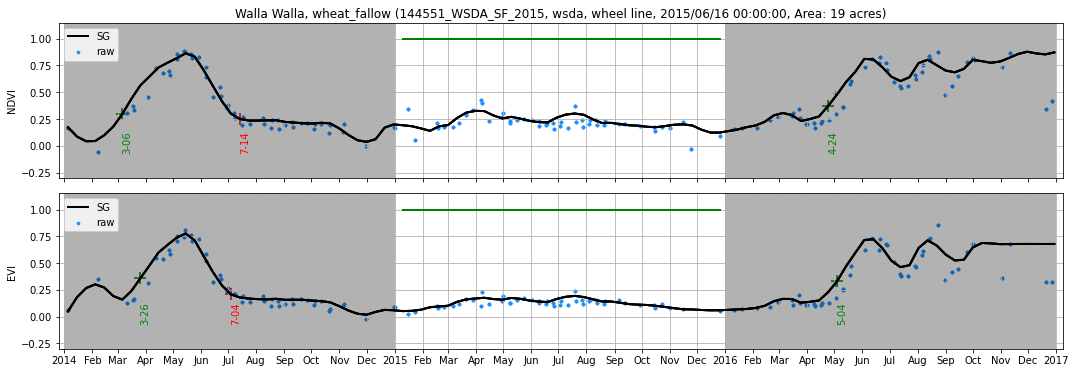

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2) = axs;
ax1.grid(True); ax2.grid(True); 
# ax3.grid(True); ax4.grid(True); ax5.grid(True); ax6.grid(True);

# Plot NDVIs
npc.SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_NDVI,
                                        SG_dt = curr_SG_NDVI,
                                        idx = "NDVI",
                                        ax = ax1,
                                        onset_cut = 0.3, 
                                        offset_cut = 0.3);

# Plot EVIs
npc.SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_EVI,
                                            SG_dt = curr_SG_EVI,
                                            idx = "EVI",
                                            ax = ax2,
                                            onset_cut = 0.3, 
                                            offset_cut = 0.3);


ax1.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax1.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)

start = str(given_year) + '-01-01'
end = str(given_year) + '-12-01'
vertical_dates = pd.date_range(start, end, freq='MS')
vertical_dates = vertical_dates[::3]
# ax1.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

# ax2.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

vertical_annotations = vertical_dates[::3]
# style = dict(size=10, color='g', rotation='vertical')
# for ii in np.arange(0, len(vertical_annotations)):
#     ax1.text(x = vertical_annotations[ii],
#              y = 0, 
#              s= str(vertical_dates[ii].month) + "-" + str(vertical_dates[ii].day),
#              **style
#             )
"""
   Title is already set in the function above. 
   We can replace/overwrite it here:
"""
if county == "Monterey2014":
    plant = curr_SF_data['Crop2014'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = "Land IQ"
    survey_date = curr_SF_data['LstModDat'].unique()[0]
    plot_title = county + ", " + plant + " (" + ID + ", " + data_source + ", " + survey_date +")"
else:
    plant = curr_SF_data['CropTyp'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = curr_SF_data['DataSrc'].unique()[0]
    irrig_type = curr_SF_data['Irrigtn'].unique()[0]
    survey_date = curr_SF_data['LstSrvD'].unique()[0]
    cc =  curr_SF_data.county.unique()[0]
    area = curr_SF_data.Acres.unique()[0]
    
    plot_title = cc + ", " + plant + " (" + ID + ", " + data_source + ", " + \
                   irrig_type + ", " + survey_date + ", Area: " + str(area) + " acres)"

ax1.set_title(plot_title);
ax2.set_title("");

# import matplotlib.date as mdates
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
# for label in ax1.get_xticklabels(which='major'):
#     label.set(rotation=90, horizontalalignment='right')

# ax1.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
ax2.xaxis.set_major_formatter(
    matplotlib.dates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))

plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path +'lessBusyOne.png'
plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight', facecolor="w")
# plt.close('all')
counter += 1

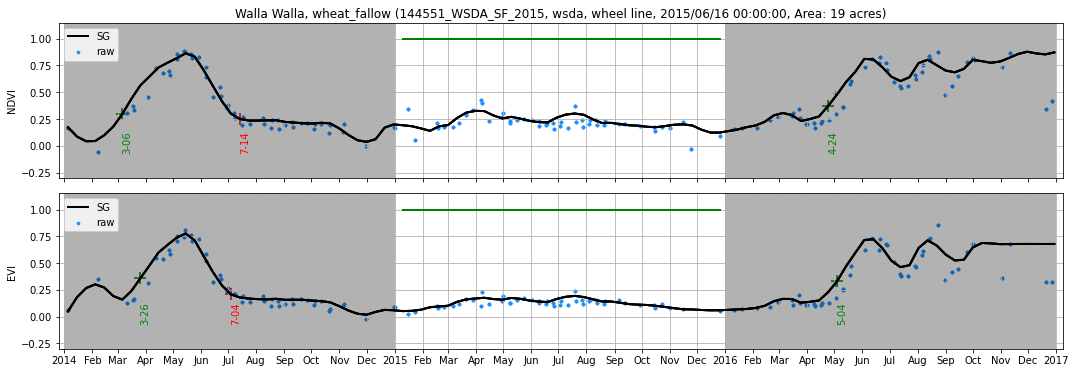

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2) = axs;
ax1.grid(True); ax2.grid(True); 
# ax3.grid(True); ax4.grid(True); ax5.grid(True); ax6.grid(True);

# Plot NDVIs
npc.SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_NDVI,
                                        SG_dt = curr_SG_NDVI,
                                        idx = "NDVI",
                                        ax = ax1,
                                        onset_cut = 0.3, 
                                        offset_cut = 0.3);

# Plot EVIs
npc.SG_clean_SOS_orchardinPlot_VerticalLine(raw_dt = curr_raw_EVI,
                                            SG_dt = curr_SG_EVI,
                                            idx = "EVI",
                                            ax = ax2,
                                            onset_cut = 0.3, 
                                            offset_cut = 0.3);


ax1.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax1.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year+1, 1, 1), datetime(given_year+2, 1, 1), facecolor='.01', alpha=0.3)
ax2.axvspan(datetime(given_year-1, 1, 1), datetime(given_year, 1, 1), facecolor='.01', alpha=0.3)

start = str(given_year) + '-01-01'
end = str(given_year) + '-12-01'
vertical_dates = pd.date_range(start, end, freq='MS')
vertical_dates = vertical_dates[::3]
# ax1.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

# ax2.vlines(x=vertical_dates, lw=1,
#            ymin=-1, ymax=1, color='r', 
#            label='test lines')

vertical_annotations = vertical_dates[::3]
# style = dict(size=10, color='g', rotation='vertical')
# for ii in np.arange(0, len(vertical_annotations)):
#     ax1.text(x = vertical_annotations[ii],
#              y = 0, 
#              s= str(vertical_dates[ii].month) + "-" + str(vertical_dates[ii].day),
#              **style
#             )
"""
   Title is already set in the function above. 
   We can replace/overwrite it here:
"""
if county == "Monterey2014":
    plant = curr_SF_data['Crop2014'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = "Land IQ"
    survey_date = curr_SF_data['LstModDat'].unique()[0]
    plot_title = county + ", " + plant + " (" + ID + ", " + data_source + ", " + survey_date +")"
else:
    plant = curr_SF_data['CropTyp'].unique()[0].lower().replace(" ", "_").replace(",", "").replace("/", "_")
    data_source = curr_SF_data['DataSrc'].unique()[0]
    irrig_type = curr_SF_data['Irrigtn'].unique()[0]
    survey_date = curr_SF_data['LstSrvD'].unique()[0]
    cc =  curr_SF_data.county.unique()[0]
    area = curr_SF_data.Acres.unique()[0]
    
    plot_title = cc + ", " + plant + " (" + ID + ", " + data_source + ", " + \
                   irrig_type + ", " + survey_date + ", Area: " + str(area) + " acres)"

ax1.set_title(plot_title);
ax2.set_title("");

ax2.xaxis.set_major_formatter(ConciseDateFormatter(ax2.xaxis.get_major_locator()))

plot_path = "/Users/hn/Desktop/"
os.makedirs(plot_path, exist_ok=True)

fig_name = plot_path +'lessBusyOne.png'
plt.savefig(fname = fig_name, dpi=100, bbox_inches='tight', facecolor="w")
# plt.close('all')
counter += 1

In [25]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.4.3
